In [2]:
import pandas as pd
import os
import sklearn

In [3]:
final_train = pd.read_csv(r"G:\Signature Verification Project\MCYT 100 Dataset\Processed\new_processed\final_train.csv")

final_test = pd.read_csv(r"G:\Signature Verification Project\MCYT 100 Dataset\Processed\new_processed\final_test.csv")

In [4]:
final_train.shape, final_train.head()

((75000, 27),
       G_ID      G_X       G_Y  G_PRESSURE  G_AZIMUTH  G_ELEVATION  G_POSITION  \
 0  0000v00  2153.67  7658.796     697.583     63.417      129.039     7991.59   
 1  0000v00  2153.67  7658.796     697.583     63.417      129.039     7991.59   
 2  0000v00  2153.67  7658.796     697.583     63.417      129.039     7991.59   
 3  0000v00  2153.67  7658.796     697.583     63.417      129.039     7991.59   
 4  0000v00  2153.67  7658.796     697.583     63.417      129.039     7991.59   
 
    G_DISPLACEMENT  G_VELOCITY  G_ANGULAR_VELOCITY  ...  FG_AZIMUTH  \
 0         201.165      20.116              -0.001  ...      64.386   
 1         201.165      20.116              -0.001  ...      62.416   
 2         201.165      20.116              -0.001  ...      63.204   
 3         201.165      20.116              -0.001  ...      65.703   
 4         201.165      20.116              -0.001  ...      63.354   
 
    FG_ELEVATION  FG_POSITION FG_DISPLACEMENT  FG_VELOCITY  \
 0

In [5]:
final_test.shape, final_test.head()

((50000, 27),
       G_ID       G_X      G_Y  G_PRESSURE  G_AZIMUTH  G_ELEVATION  G_POSITION  \
 0  0060v00  2886.766  7956.81     582.757     61.542      133.213    8524.225   
 1  0060v00  2886.766  7956.81     582.757     61.542      133.213    8524.225   
 2  0060v00  2886.766  7956.81     582.757     61.542      133.213    8524.225   
 3  0060v00  2886.766  7956.81     582.757     61.542      133.213    8524.225   
 4  0060v00  2886.766  7956.81     582.757     61.542      133.213    8524.225   
 
    G_DISPLACEMENT  G_VELOCITY  G_ANGULAR_VELOCITY  ...  FG_AZIMUTH  \
 0           46.44       4.644                 0.0  ...      62.271   
 1           46.44       4.644                 0.0  ...      60.032   
 2           46.44       4.644                 0.0  ...      61.177   
 3           46.44       4.644                 0.0  ...      64.820   
 4           46.44       4.644                 0.0  ...      59.851   
 
    FG_ELEVATION  FG_POSITION FG_DISPLACEMENT  FG_VELOCITY  \
 0

In [6]:
final_test.columns

Index(['G_ID', 'G_X', 'G_Y', 'G_PRESSURE', 'G_AZIMUTH', 'G_ELEVATION',
       'G_POSITION', 'G_DISPLACEMENT', 'G_VELOCITY', 'G_ANGULAR_VELOCITY',
       'G_ACCELERATION', 'G_CENTRIPETAL_ACCELERATION',
       'G_TANGENTIAL_ACCELERATION', 'FG_ID', 'FG_X', 'FG_Y', 'FG_PRESSURE',
       'FG_AZIMUTH', 'FG_ELEVATION', 'FG_POSITION', 'FG_DISPLACEMENT',
       'FG_VELOCITY', 'FG_ANGULAR_VELOCITY', 'FG_ACCELERATION',
       'FG_CENTRIPETAL_ACCELERATION', 'FG_TANGENTIAL_ACCELERATION', 'F_G'],
      dtype='object')

In [8]:
'''
## splitting for train, test, eval
train_y = final_train["f_g"][:-1000]
train_x = final_train.drop("f_g", axis = 1)[:-1000]

val_y = final_train["f_g"][-1000:]
val_x = final_train.drop("f_g", axis = 1)[-1000:]

test_y = final_test["f_g"]
test_x = final_test.drop("f_g", axis = 1)

print("splitting complete")

'''

## splitting for train, test, eval
train_y = final_train["F_G"]
train_x = final_train.drop(["F_G", "FG_ID", "G_ID"], axis = 1)

test_y = final_test["F_G"]
test_x = final_test.drop(["F_G", "FG_ID", "G_ID"], axis = 1)

print("splitting complete")

splitting complete


## xgboost

In [9]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
print("model loaded")

model.fit(train_x, train_y)
print("model trained")

# make predictions for test data
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
print("pred complete")

# evaluate predictions
accuracy = sklearn.metrics.accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("accuracy given")


model loaded


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model trained
pred complete
Accuracy: 83.48%
accuracy given


## Gaussian Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(train_x, train_y).predict(test_x)

print("Number of mislabeled points out of a total %d points : %d" % (test_x.shape[0], (test_y != y_pred).sum()))

Number of mislabeled points out of a total 50000 points : 23675


In [12]:
(23675-50000)/5748

-4.579853862212944

## stacking using random forest and svm as base models and logistic regression as meta classifier

In [13]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
def stacking(x_train,y_train,x_test):
    lr=LogisticRegression(random_state=0)
    rf = RandomForestClassifier(random_state=0)
    clf=svm.SVC(random_state=0)
    sclf = StackingClassifier(classifiers=[clf,rf], 
                          meta_classifier=lr)
    sclf.fit(x_train,y_train)
    y1=sclf.predict(x_test)
    return y1

In [14]:
y1 = stacking(train_x, train_y, test_x)

In [15]:
accuracy = sklearn.metrics.accuracy_score(test_y, y1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("accuracy given")

Accuracy: 78.60%
accuracy given


## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter = 1000000)

In [18]:
logisticRegr.fit(train_x, train_y)

LogisticRegression(max_iter=1000000)

In [19]:
### Accuracy for Logistic Regression

score = logisticRegr.score(test_x, test_y)
print(score)

0.8274182324286709


In [20]:
predictions = logisticRegr.predict(test_x)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [23]:
## Confusion Matrix

cm = metrics.confusion_matrix(test_y, predictions)
print(cm)

[[2377  395]
 [ 597 2379]]


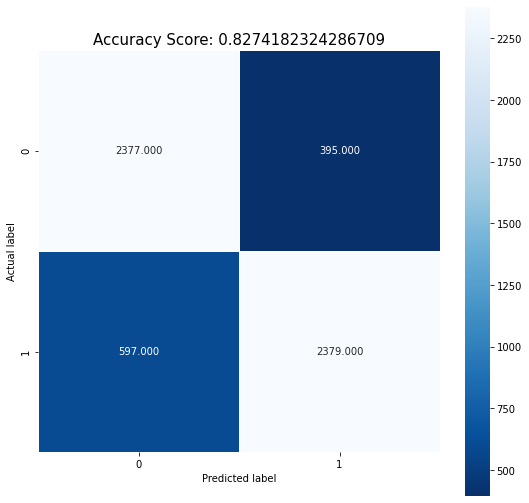

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);